In [1]:
# This project is to determine weather the Falcon 9 first stage will land successfully or not

In [2]:
# Import some basic libraries

In [3]:
# Pandas is a library for data manipulation and analysis 
import pandas as pd
# Requests is to get the data from API
import requests 
# Numpy is for advance statistical tasks
import numpy as np
# Matplotlib is for data visualization
import matplotlib.pyplot as plt
# To draw plots within the cells
%matplotlib inline
# For date, time manipulation
import datetime

In [4]:
# I'll create some helpful functions to make the process of extracting data from API easier
# These functions for some important features form the dataset 

In [5]:
# This function for the rocket version (falcon 1, falcon 9, etc...)
def getBoosterVersion(df):
    for x in df['rocket']:
        if x:
            response=requests.get('https://api.spacexdata.com/v4/rockets/'+str(x)).json()
            BoosterVersion.append(response['name'])

In [6]:
# this function for the payload the rocket carry
def getPayloadMass(df):
    for x in df['payloads']:
        if x:
            response=requests.get('https://api.spacexdata.com/v4/payloads/'+x).json()
            Payload_mass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [7]:
# this function for the exact location site of rocket in each launch process
def getLaunchSite(df):
    for x in df['launchpad']:
        if x:
            
            response=requests.get('https://api.spacexdata.com/v4/launchpads/'+str(x)).json()
            Latitude.append(response['latitude'])
            Longitude.append(response['longitude'])
            LaunchSite.append(response['name'])
        

In [8]:
# this function to get more details about the rocket and the outcome of the launch process
def getCores(df):
    for x in df['cores']:
        if x['core']!=None:
            response=requests.get('https://api.spacexdata.com/v4/cores/'+x['core']).json()
            Block.append(response['block'])
            Serial.append(response['serial'])
            ReusedCount.append(response['reuse_count'])
        else:
            Block.append(None)
            Serial.append(None)
            ReusedCount.append(None)
        Outcome.append(str(x['landing_success'])+' '+str(x['landing_type']))
        Flights.append(x['flight'])
        GridFins.append(x['gridfins'])
        Reused.append(x['reused'])
        Legs.append(x['legs'])
        LandingPad.append(x['landpad'])

In [9]:
# URL for the data set
url='https://api.spacexdata.com/v4/launches/past'


In [10]:
response=requests.get(url)
response

<Response [200]>

In [11]:
# first impression of the data 
response.json()


[{'fairings': {'reused': False,
   'recovery_attempt': False,
   'recovered': False,
   'ships': []},
  'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png',
    'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'},
   'reddit': {'campaign': None,
    'launch': None,
    'media': None,
    'recovery': None},
   'flickr': {'small': [], 'original': []},
   'presskit': None,
   'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88',
   'youtube_id': '0a_00nJ_Y88',
   'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
   'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'},
  'static_fire_date_utc': '2006-03-17T00:00:00.000Z',
  'static_fire_date_unix': 1142553600,
  'net': False,
  'window': 0,
  'rocket': '5e9d0d95eda69955f709d1eb',
  'success': False,
  'failures': [{'time': 33,
    'altitude': None,
    'reason': 'merlin engine failure'}],
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'crew

In [12]:
#Create the Dataframe as df
df=pd.json_normalize(response.json())

In [13]:
#print first 5 rows of the df
df.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [14]:
# Since the data are messy , another link was found and provided by Coursera website

In [15]:
url2='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
df=pd.read_json(url2)
df.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,...,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id
0,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,...,"[{'time': 33, 'altitude': None, 'reason': 'mer...",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Successful first stage burn and transition to ...,...,"[{'time': 301, 'altitude': 289, 'reason': 'har...",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision betwe...,...,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",5eb87cdbffd86e000604b32c
3,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,Ratsat was carried to orbit on the first succe...,...,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",5eb87cdbffd86e000604b32d
4,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,True,None,...,[],5,RazakSat,2009-07-13T03:35:00.000Z,1247456100,2009-07-13T15:35:00+12:00,hour,False,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",5eb87cdcffd86e000604b32e


In [16]:
# this df looks solid and consist yet it needs some manipulation
# let's focus only about the most important features on the table and update the df

In [17]:
df=df[['rocket','date_utc','payloads','launchpad','cores','flight_number']]

#make sure payload, and cores have one clean value
df=df[df['payloads'].map(len)==1]
df=df[df['cores'].map(len)==1]

#converting list into numerical value
df['payloads']=df['payloads'].map(lambda x : x[0])
df['cores']=df['cores'].map(lambda x : x[0])

#to get the date 
df['date_utc']=pd.to_datetime(df['date_utc']).dt.date

#only get the records before November 2020
df=df[df['date_utc']<= datetime.date(2020,11,13)]

In [18]:
#Create an empty dictionaries for the final features 
BoosterVersion=[]
Outcome=[]
LaunchSite=[]
Latitude=[]
Longitude=[]
ReusedCount=[]
Flights=[]
Payload_mass=[]
Orbit=[]
Block=[]
Serial=[]
GridFins=[]
Reused=[]
Legs=[]
LandingPad=[]

In [19]:
BoosterVersion

[]

In [20]:
#call the functions I created before to fill the df
getBoosterVersion(df)

In [21]:
#print first 11 element
BoosterVersion[0:11]

['Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9']

In [22]:
getPayloadMass(df)

In [23]:
Payload_mass[0:8]

[20, None, 165, 200, None, 525, 677, 500]

In [24]:
Orbit[0:8]

['LEO', 'LEO', 'LEO', 'LEO', 'LEO', 'LEO', 'ISS', 'PO']

In [25]:
getCores(df)

In [26]:
getLaunchSite(df)

In [27]:
LaunchSite[0:10]

['Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'Kwajalein Atoll',
 'CCSFS SLC 40',
 'CCSFS SLC 40',
 'CCSFS SLC 40',
 'VAFB SLC 4E',
 'CCSFS SLC 40',
 'CCSFS SLC 40']

In [28]:
Outcome[0:20]

['None None',
 'None None',
 'None None',
 'None None',
 'None None',
 'None None',
 'None None',
 'False Ocean',
 'None None',
 'None None',
 'True Ocean',
 'True Ocean',
 'None None',
 'None None',
 'False Ocean',
 'False ASDS',
 'True Ocean',
 'False ASDS',
 'None None',
 'None ASDS']

In [29]:
#from empty dictionaries above I'll fill the all rows with data by below code
launch_dict={'Flights_Number':list(df['flight_number']),
'Date':list(df['date_utc']),
'BoosterVersion':BoosterVersion,
'LaunchSite':LaunchSite,
'PayloadMass':Payload_mass,
'Orbit':Orbit,
'Longitude':Longitude,
'Latitude':Latitude,
'ReusedCount':ReusedCount,
'GridFins':GridFins,
'Block':Block,
'Serial':Serial,
'Outcome':Outcome,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad}

In [30]:
#create df from the launch_dict object
df=pd.DataFrame(launch_dict)
df

,Flights_Number,Date,BoosterVersion,LaunchSite,PayloadMass,Orbit,Longitude,Latitude,ReusedCount,GridFins,Block,Serial,Outcome,Reused,Legs,LandingPad
0,1,2006-03-24,Falcon 1,Kwajalein Atoll,20.0,LEO,167.743129,9.047721,0,False,NaN,Merlin1A,None None,False,False,None
1,2,2007-03-21,Falcon 1,Kwajalein Atoll,NaN,LEO,167.743129,9.047721,0,False,NaN,Merlin2A,None None,False,False,None
2,4,2008-09-28,Falcon 1,Kwajalein Atoll,165.0,LEO,167.743129,9.047721,0,False,NaN,Merlin2C,None None,False,False,None
3,5,2009-07-13,Falcon 1,Kwajalein Atoll,200.0,LEO,167.743129,9.047721,0,False,NaN,Merlin3C,None None,False,False,None
4,6,2010-06-04,Falcon 9,CCSFS SLC 40,NaN,LEO,-80.577366,28.561857,0,False,1.0,B0003,None None,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,12,True,5.0,B1060,True ASDS,True,True,5e9e3032383ecb6bb234e7ca
90,103,2020-10-06,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,13,True,5.0,B1058,True ASDS,True,True,5e9e3032383ecb6bb234e7ca
91,104,2020-10-18,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,12,True,5.0,B1051,True ASDS,True,True,5e9e3032383ecb6bb234e7ca
92,105,2020-10-24,Falcon 9,CCSFS SLC 40,15600.0,VLEO,-80.577366,28.561857,12,True,5.0,B1060,True ASDS,True,True,5e9e3033383ecbb9e534e7cc


In [31]:
#count the records for each row to ensure our data are complete
for key in launch_dict:
    print(f"{key}: {len(launch_dict[key])}")


Flights_Number: 94
Date: 94
BoosterVersion: 94
LaunchSite: 94
PayloadMass: 94
Orbit: 94
Longitude: 94
Latitude: 94
ReusedCount: 94
GridFins: 94
Block: 94
Serial: 94
Outcome: 94
Reused: 94
Legs: 94
LandingPad: 94


In [32]:
df.head()

,Flights_Number,Date,BoosterVersion,LaunchSite,PayloadMass,Orbit,Longitude,Latitude,ReusedCount,GridFins,Block,Serial,Outcome,Reused,Legs,LandingPad
0,1,2006-03-24,Falcon 1,Kwajalein Atoll,20.0,LEO,167.743129,9.047721,0,False,NaN,Merlin1A,None None,False,False,None
1,2,2007-03-21,Falcon 1,Kwajalein Atoll,NaN,LEO,167.743129,9.047721,0,False,NaN,Merlin2A,None None,False,False,None
2,4,2008-09-28,Falcon 1,Kwajalein Atoll,165.0,LEO,167.743129,9.047721,0,False,NaN,Merlin2C,None None,False,False,None
3,5,2009-07-13,Falcon 1,Kwajalein Atoll,200.0,LEO,167.743129,9.047721,0,False,NaN,Merlin3C,None None,False,False,None
4,6,2010-06-04,Falcon 9,CCSFS SLC 40,NaN,LEO,-80.577366,28.561857,0,False,1.0,B0003,None None,False,False,None


In [33]:
#to get general info abouth the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flights_Number  94 non-null     int64  
 1   Date            94 non-null     object 
 2   BoosterVersion  94 non-null     object 
 3   LaunchSite      94 non-null     object 
 4   PayloadMass     88 non-null     float64
 5   Orbit           94 non-null     object 
 6   Longitude       94 non-null     float64
 7   Latitude        94 non-null     float64
 8   ReusedCount     94 non-null     int64  
 9   GridFins        94 non-null     bool   
 10  Block           90 non-null     float64
 11  Serial          94 non-null     object 
 12  Outcome         94 non-null     object 
 13  Reused          94 non-null     bool   
 14  Legs            94 non-null     bool   
 15  LandingPad      64 non-null     object 
dtypes: bool(3), float64(4), int64(2), object(7)
memory usage: 10.0+ KB


In [34]:
#to get statistical summary of the df
df.describe()

,Flights_Number,PayloadMass,Longitude,Latitude,ReusedCount,Block
count,94.000000,88.000000,94.000000,94.000000,94.000000,90.000000
mean,54.202128,5919.165341,-75.553302,28.581782,3.053191,3.500000
std,30.589048,4909.689575,53.391880,4.639981,4.153938,1.595288
min,1.000000,20.000000,-120.610829,9.047721,0.000000,1.000000
25%,28.250000,2406.250000,-80.603956,28.561857,0.000000,2.000000
50%,52.500000,4414.000000,-80.577366,28.561857,1.000000,4.000000
75%,81.500000,9543.750000,-80.577366,28.608058,4.000000,5.000000
max,106.000000,15600.000000,167.743129,34.632093,13.000000,5.000000


In [35]:
#our project is about Falcon 9 , I don't need Falcon 1 , I'll remove it 
df_falcon9=df[df['BoosterVersion']!='Falcon 1']

In [36]:
df_falcon9

,Flights_Number,Date,BoosterVersion,LaunchSite,PayloadMass,Orbit,Longitude,Latitude,ReusedCount,GridFins,Block,Serial,Outcome,Reused,Legs,LandingPad
4,6,2010-06-04,Falcon 9,CCSFS SLC 40,NaN,LEO,-80.577366,28.561857,0,False,1.0,B0003,None None,False,False,None
5,8,2012-05-22,Falcon 9,CCSFS SLC 40,525.0,LEO,-80.577366,28.561857,0,False,1.0,B0005,None None,False,False,None
6,10,2013-03-01,Falcon 9,CCSFS SLC 40,677.0,ISS,-80.577366,28.561857,0,False,1.0,B0007,None None,False,False,None
7,11,2013-09-29,Falcon 9,VAFB SLC 4E,500.0,PO,-120.610829,34.632093,0,False,1.0,B1003,False Ocean,False,False,None
8,12,2013-12-03,Falcon 9,CCSFS SLC 40,3170.0,GTO,-80.577366,28.561857,0,False,1.0,B1004,None None,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,12,True,5.0,B1060,True ASDS,True,True,5e9e3032383ecb6bb234e7ca
90,103,2020-10-06,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,13,True,5.0,B1058,True ASDS,True,True,5e9e3032383ecb6bb234e7ca
91,104,2020-10-18,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,12,True,5.0,B1051,True ASDS,True,True,5e9e3032383ecb6bb234e7ca
92,105,2020-10-24,Falcon 9,CCSFS SLC 40,15600.0,VLEO,-80.577366,28.561857,12,True,5.0,B1060,True ASDS,True,True,5e9e3033383ecbb9e534e7cc


In [37]:
#ordering the FlightNumber column from 1 
df_falcon9.loc[:,'FlightNumber'] = list(range(1, df_falcon9.shape[0]+1))
df_falcon9

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1472\1801579792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falcon9.loc[:,'FlightNumber'] = list(range(1, df_falcon9.shape[0]+1))


,Flights_Number,Date,BoosterVersion,LaunchSite,PayloadMass,Orbit,Longitude,Latitude,ReusedCount,GridFins,Block,Serial,Outcome,Reused,Legs,LandingPad,FlightNumber
4,6,2010-06-04,Falcon 9,CCSFS SLC 40,NaN,LEO,-80.577366,28.561857,0,False,1.0,B0003,None None,False,False,None,1
5,8,2012-05-22,Falcon 9,CCSFS SLC 40,525.0,LEO,-80.577366,28.561857,0,False,1.0,B0005,None None,False,False,None,2
6,10,2013-03-01,Falcon 9,CCSFS SLC 40,677.0,ISS,-80.577366,28.561857,0,False,1.0,B0007,None None,False,False,None,3
7,11,2013-09-29,Falcon 9,VAFB SLC 4E,500.0,PO,-120.610829,34.632093,0,False,1.0,B1003,False Ocean,False,False,None,4
8,12,2013-12-03,Falcon 9,CCSFS SLC 40,3170.0,GTO,-80.577366,28.561857,0,False,1.0,B1004,None None,False,False,None,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,12,True,5.0,B1060,True ASDS,True,True,5e9e3032383ecb6bb234e7ca,86
90,103,2020-10-06,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,13,True,5.0,B1058,True ASDS,True,True,5e9e3032383ecb6bb234e7ca,87
91,104,2020-10-18,Falcon 9,KSC LC 39A,15600.0,VLEO,-80.603956,28.608058,12,True,5.0,B1051,True ASDS,True,True,5e9e3032383ecb6bb234e7ca,88
92,105,2020-10-24,Falcon 9,CCSFS SLC 40,15600.0,VLEO,-80.577366,28.561857,12,True,5.0,B1060,True ASDS,True,True,5e9e3033383ecbb9e534e7cc,89


In [38]:
#let's find out if the df have missing values 
df_falcon9.isnull().sum()

Flights_Number     0
Date               0
BoosterVersion     0
LaunchSite         0
PayloadMass        5
Orbit              0
Longitude          0
Latitude           0
ReusedCount        0
GridFins           0
Block              0
Serial             0
Outcome            0
Reused             0
Legs               0
LandingPad        26
FlightNumber       0
dtype: int64

In [39]:
#form above I'll replace missing values in PayloadMass by the mean 
df_falcon9['PayloadMass'].mean()

6123.547647058824

In [40]:
df_falcon9['PayloadMass']=df_falcon9['PayloadMass'].replace(np.NaN,df_falcon9['PayloadMass'].mean())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1472\2560222060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falcon9['PayloadMass']=df_falcon9['PayloadMass'].replace(np.NaN,df_falcon9['PayloadMass'].mean())


In [41]:
#for Lnading Pad , I'll deal with it later by one hot encoder ( it will give None value which represent the pad isn't used )
df_falcon9.isnull().sum()

Flights_Number     0
Date               0
BoosterVersion     0
LaunchSite         0
PayloadMass        0
Orbit              0
Longitude          0
Latitude           0
ReusedCount        0
GridFins           0
Block              0
Serial             0
Outcome            0
Reused             0
Legs               0
LandingPad        26
FlightNumber       0
dtype: int64

In [42]:
df_falcon9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 4 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flights_Number  90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   LaunchSite      90 non-null     object 
 4   PayloadMass     90 non-null     float64
 5   Orbit           90 non-null     object 
 6   Longitude       90 non-null     float64
 7   Latitude        90 non-null     float64
 8   ReusedCount     90 non-null     int64  
 9   GridFins        90 non-null     bool   
 10  Block           90 non-null     float64
 11  Serial          90 non-null     object 
 12  Outcome         90 non-null     object 
 13  Reused          90 non-null     bool   
 14  Legs            90 non-null     bool   
 15  LandingPad      64 non-null     object 
 16  FlightNumber    90 non-null     int64  
dtypes: bool(3), float64(4), int64(3), obj

In [43]:
#updated dataset with new URL, Outcome represent weather the landing is success or not
dff=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv')
dff

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857


In [44]:
dff.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [45]:
dff

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857


In [46]:
#the missing value by percentage 
dff.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        27.659574
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [47]:
# let's now do some EDA for the df

In [48]:

dff.value_counts('LaunchSite')
# CCAFS SLC 40 is the most site used for launching Falcon 9

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
dtype: int64

In [49]:
dff.value_counts('Orbit')

# GTO, ISS, and VLEO are the most orbits Falcon 9 flight to 

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
GEO       1
HEO       1
SO        1
dtype: int64

In [50]:
dff.value_counts('Outcome')

#True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed on a drone ship False ASDS means the mission outcome was unsuccessfully landed on a drone ship.

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
dtype: int64

In [51]:
landing_outcomes=dff.value_counts('Outcome')

In [52]:
# I would like to separate the success and failure landing in easer way 

In [53]:
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i, outcome)


0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [54]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [55]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])

In [56]:
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [57]:
good_outcomes=set(landing_outcomes.keys()[[0,2,4]])

In [58]:
good_outcomes

{'True ASDS', 'True Ocean', 'True RTLS'}

In [59]:
# I want 0 to be for bad landing and 1 for good landing
dff['Outcome']=dff['Outcome'].apply(lambda x:0 if x in bad_outcomes else 1)

In [60]:
dff

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,0,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,1,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,1,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,1,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,1,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857


In [61]:
#To rename the columns
dff.rename(columns={'Outcome':'landing_outcomes'},inplace=True)

In [62]:
dff.value_counts('LaunchSite')

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
dtype: int64

In [63]:
dff['landing_outcomes'].mean()

0.6666666666666666

In [64]:
dff.value_counts('Orbit')

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
GEO       1
HEO       1
SO        1
dtype: int64

In [65]:
# the final result
dff.value_counts(['landing_outcomes'])

landing_outcomes
1                   60
0                   30
dtype: int64

In [66]:
# I'll do some EDA using both SQL , and Visualization 
#let's start with SQL
#install required libraries and launch SQL in Jupyter Notebook

In [67]:
!pip install sqlalchemy==1.3.9


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.



  Using cached SQLAlchemy-1.3.9-cp311-cp311-win_amd64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.42
    Uninstalling SQLAlchemy-2.0.42:
      Successfully uninstalled SQLAlchemy-2.0.42


In [68]:
!pip install ipython-sql
!pip install ipython-sql prettytable

  Obtaining dependency information for sqlalchemy>=2.0 from https://files.pythonhosted.org/packages/91/72/55b0c34e39feb81991aa3c974d85074c356239ac1170dfb81a474b4c23b3/sqlalchemy-2.0.42-cp311-cp311-win_amd64.whl.metadata
  Using cached sqlalchemy-2.0.42-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
Using cached sqlalchemy-2.0.42-cp311-cp311-win_amd64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [69]:
%load_ext sql

In [70]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [71]:
!pip install -q pandas

In [72]:
%sql sqlite:///my_data1.db

In [73]:
#conntect the df with the Database
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [74]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [75]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [76]:
import pandas as pd
import pandasql as ps

# Load your CSV file into a DataFrame
df = pd.read_csv('C:/Users/LENOVO/Downloads/Spacex.csv')

# SQL query as a string
query = "SELECT DISTINCT LaunchSite FROM SPACEXTBL"  # Use correct column name

# Run the SQL query
result = ps.sqldf(query, locals())

# Show results
print(result)


ModuleNotFoundError: No module named 'pandasql'

In [ ]:
%sql SELECT DISTINCT LaunchSite from SPACEXTBL;

In [ ]:
%sql PRAGMA table_info(SPACEXTBL);

#get information about the table

In [77]:
%sql Select DISTINCT Launch_Site from SPACEXTBL;
#knowing all names of Launch sites

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [78]:
%sql SELECT * from SPACEXTBL WHERE (Launch_Site) LIKE 'CCA%' LIMIT 5;
#print first 5 records form the table with launchsite name start with CCA

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [79]:
%sql Select * from spacextbl Where (Launch_Site) like 'CCA%' limit 25;
#as above but print first 25 records

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170,GTO,SES,Success,No attempt
2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325,GTO,Thaicom,Success,No attempt
2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296,LEO (ISS),NASA (CRS),Success,Controlled (ocean)
2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316,LEO,Orbcomm,Success,Controlled (ocean)
2014-08-05,8:00:00,F9 v1.1,CCAFS LC-40,AsiaSat 8,4535,GTO,AsiaSat,Success,No attempt


In [80]:
%sql select sum(PAYLOAD_MASS__KG_) from spacextbl where Customer='NASA (CRS)';

#calculate the total PayloadMass for NASA

 * sqlite:///my_data1.db
Done.


sum(PAYLOAD_MASS__KG_)
45596


In [81]:
%%sql SELECT SUM(PAYLOAD_MASS__KG_) AS TotalPayloadMass
FROM SPACEXTBL
WHERE Customer = 'NASA (CRS)';

#print a column with name (TotalPayloadMass ) for above

 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "#print": syntax error
[SQL: #print a column with name (TotalPayloadMass ) for above]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [82]:
%sql select sum(PAYLOAD_MASS__KG_) from spacextbl where Customer='SpaceX';

#we can find that SpaceX have much weight comparing with Nasa

 * sqlite:///my_data1.db
Done.


sum(PAYLOAD_MASS__KG_)
185220


In [83]:
%%sql SELECT MIN(Date) AS First_Success_landing_pad
FROM SPACEXTBL 
WHERE Landing_Outcome ='Success (ground pad)';

#I want to know the date of first success landing to ground pad

 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "#I": syntax error
[SQL: #I want to know the date of first success landing to ground pad]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [84]:
%%sql SELECT DISTINCT(Booster_Version) FROM SPACEXTBL
WHERE Landing_Outcome='Success (drone ship)'
AND PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000;

#I want to know the version booster for all sccess drone ship launches that have payload between 4000 & 6000kg


 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "#I": syntax error
[SQL: #I want to know the version booster for all sccess drone ship launches that have payload between 4000 & 6000kg]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [85]:
%%sql SELECT Landing_Outcome,COUNT(*)
FROM SPACEXTBL 
GROUp BY Landing_Outcome;

#calculate each landing outcome state

 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "#calculate": syntax error
[SQL: #calculate each landing outcome state]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [86]:
%%sql
SELECT 
  CASE 
    WHEN Mission_Outcome LIKE 'Success%' THEN 'Success'
    WHEN Mission_Outcome LIKE 'Failure%' THEN 'Failure'
  END AS Outcome,
  COUNT(*) AS Total_Count
FROM SPACEXTBL
WHERE Mission_Outcome LIKE 'Success%' OR Mission_Outcome LIKE 'Failure%'
GROUP BY Outcome;

#just to know the total success and failure launches ( I did like this code above )


 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "#just": syntax error
[SQL: #just to know the total success and failure launches ( I did like this code above )]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [87]:
%%sql SELECT Booster_Version,PAYLOAD_MASS__KG_
FROM SPACEXTBL
WHERE PAYLOAD_MASS__KG_=(
    select MAX(PAYLOAD_MASS__KG_)
    FROM SPACEXTBL);

#print each booster version with max payload

 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "#print": syntax error
[SQL: #print each booster version with max payload]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [88]:
#to know the month for each launch
%%sql SELECT 
substr(Date,6,2) AS Month,
Booster_Version,
Launch_Site,
Landing_Outcome
FROM SPACEXTBL
WHERE Landing_Outcome='Failure (drone ship)'
   AND substr(Date,0,5)='2015' ;

SyntaxError: invalid syntax (4249344255.py, line 3)

In [89]:
%%sql SELECT Landing_Outcome,COUNT(*)
FROM SPACEXTBL
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY Landing_Outcome
ORDER BY Landing_Outcome DESC;

#print in descinding order the landing outcomes between 2010, 2017

 * sqlite:///my_data1.db
Done.
(sqlite3.OperationalError) near "#print": syntax error
[SQL: #print in descinding order the landing outcomes between 2010, 2017]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [90]:
import seaborn as sns
#seaborn is important visualization library in python

In [91]:
dff

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,landing_outcomes,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,0,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,0,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,1,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,1,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,1,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,1,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857


In [92]:
# EDA with Visualization NOT SQL like above

In [93]:
df3=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
df3

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [94]:
# FlightNumber and Payloadmass VS Outcome

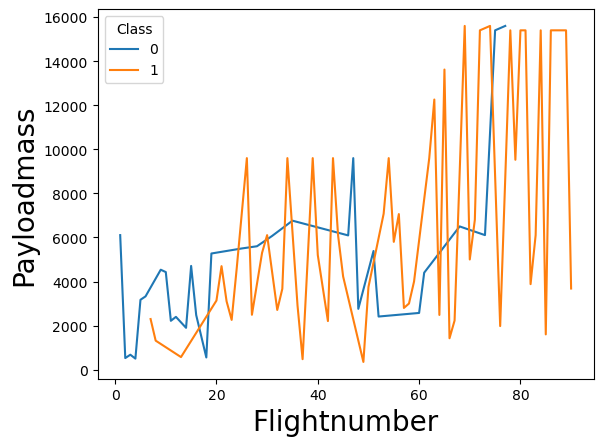

In [95]:
sns.lineplot(data=df3,x='FlightNumber',y='PayloadMass',hue='Class')
plt.xlabel('Flightnumber',fontsize=20)
plt.ylabel('Payloadmass',fontsize=20)
plt.show()

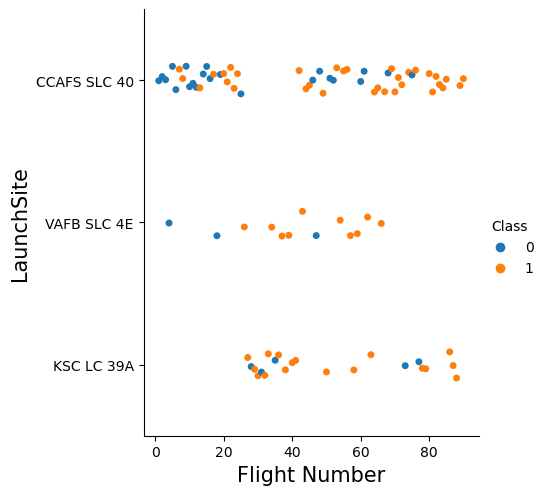

In [96]:
#Flight Number Vs Launch Site
sns.catplot(y='LaunchSite',x='FlightNumber',data=df3,hue='Class')
plt.xlabel('Flight Number',fontsize=15)
plt.ylabel('LaunchSite',fontsize=15)
plt.show()

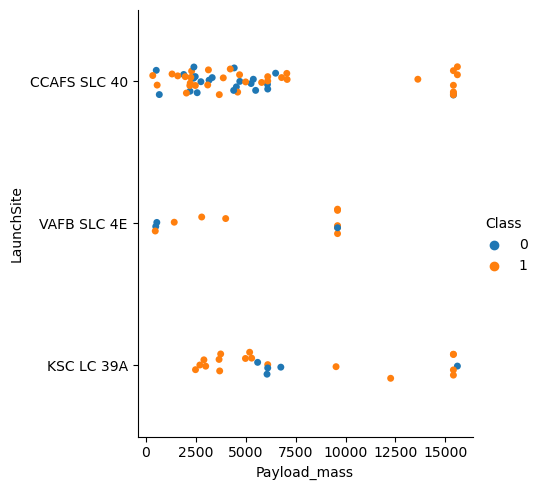

In [97]:
#Payload Mass Vs Launch Site
sns.catplot(y='LaunchSite',x='PayloadMass',data=df3,hue='Class')
plt.xlabel('Payload_mass')
plt.ylabel('LaunchSite')
plt.show()

In [98]:
#Success based on Orbit
success=df3.groupby('Orbit')['Class'].mean().reset_index()
success.columns=['Orbit','Success Rate']
success['Success Rate']=success['Success Rate']*100

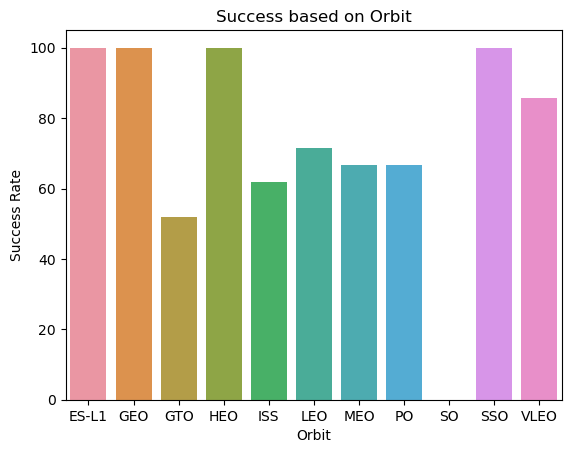

In [99]:
sns.barplot(data=success,x='Orbit',y='Success Rate')
plt.title('Success based on Orbit')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.show()

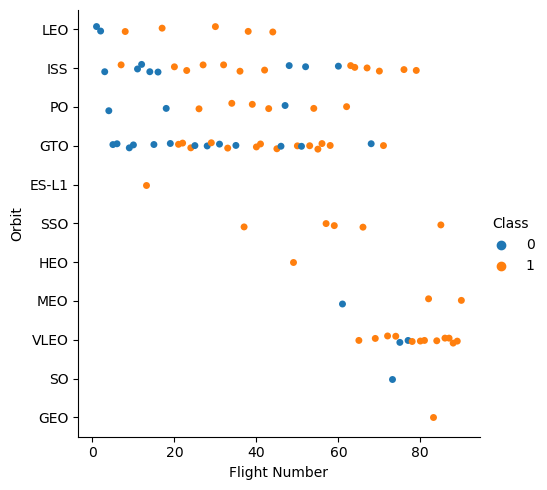

In [100]:
#Flight Number Vs Orbit
sns.catplot(y='Orbit',x='FlightNumber',data=df3,hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.show()

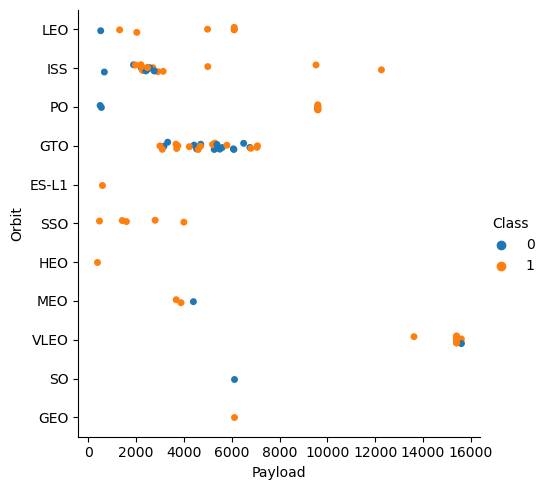

In [101]:
#payload Vs orbit
sns.catplot(y='Orbit',x='PayloadMass',data=df3,hue='Class')
plt.xlabel('Payload')
plt.ylabel('Orbit')
plt.show()

In [102]:
df3['Year']=df3['Date'].str[:4]


In [103]:
#success based on Year
suc=df3.groupby('Year')['Class'].mean().reset_index()
suc.columns=['Year','AVG Success']

In [104]:
df3.head(25)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0,2014
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,2014
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,2014
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0,2014
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0,2014


In [105]:
suc.head()

,Year,AVG Success
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


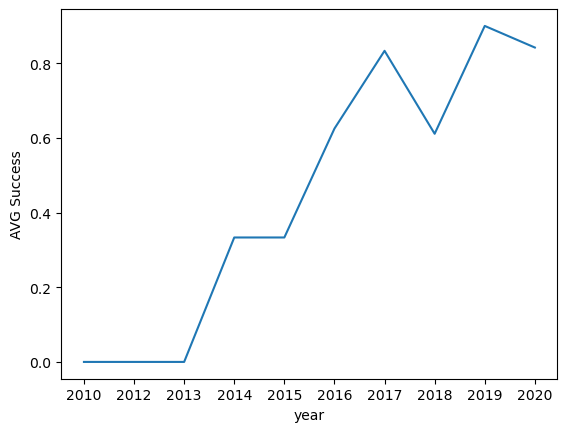

In [106]:
#Year Vs AVG Success rate
sns.lineplot(data=suc,x='Year',y='AVG Success')
plt.xlabel('year')
plt.ylabel('AVG Success')
plt.show()

In [107]:
features = df3[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [108]:
# Now it's time to build the model 

In [112]:
#to create hot encoding for str features 
col=features[['Orbit','LaunchSite','Serial','LandingPad']]

In [116]:
import pandas as pd

# List of columns to encode
cols_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply get_dummies with prefix to avoid column name collisions
df4 = pd.get_dummies(features, columns=cols_to_encode, prefix=cols_to_encode)

# Show the first few rows
df4.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
import pandas as pd

# List of columns to encode
cols_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply get_dummies with prefix to avoid column name collisions
df4 = pd.get_dummies(features, columns=cols_to_encode)

# Show the first few rows
df4.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df4 = df4.astype('float64')


In [119]:
df4.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
df4.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [121]:
suc

,Year,AVG Success
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


In [122]:
sucl=df3.groupby('LaunchSite')['Class'].mean().reset_index()
sucl.columns=['LaunchSite','Avg']
sucl

,LaunchSite,Avg
0,CCAFS SLC 40,0.600000
1,KSC LC 39A,0.772727
2,VAFB SLC 4E,0.769231


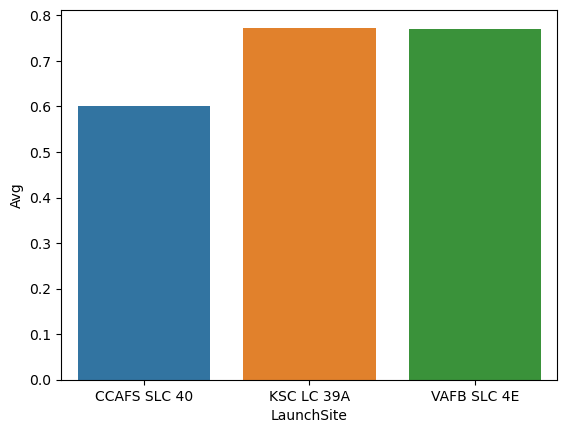

In [123]:
sns.barplot(data=sucl,x='LaunchSite',y='Avg')
plt.show()

In [124]:
# Folium lab for interactive dashboard

In [125]:
import folium as fl

In [126]:
from folium.plugins import MousePosition
from folium.plugins import MarkerCluster
from folium.features import DivIcon

In [127]:
df4.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial

In [128]:
df3.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year'],
      dtype='object')

In [129]:
sites=fl.Map(location=[df3['Latitude'].mean(),df3['Longitude'].mean()],zoom_start=5)

In [130]:
for i,row in df3.iterrows():
    fl.Marker(
        location=[row['Latitude'],row['Longitude']],
        popup=row['LaunchSite']
    ).add_to(sites)

In [131]:
sites


In [132]:
dfgeo=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
dfgeo

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.00,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.00,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.00,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.00,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.00,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
5,7,2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170.00,GTO,SES,No attempt,0,28.562302,-80.577356
6,8,2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325.00,GTO,Thaicom,No attempt,0,28.562302,-80.577356
7,9,2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296.00,LEO (ISS),NASA (CRS),Controlled (ocean),0,28.562302,-80.577356
8,10,2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316.00,LEO,Orbcomm,Controlled (ocean),0,28.562302,-80.577356
9,11,2014-08-05,8:00:00,F9 v1.1,CCAFS LC-40,AsiaSat 8,4535.00,GTO,AsiaSat,No attempt,0,28.562302,-80.577356


In [133]:
dfgeo.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [134]:
spacex=dfgeo[['Launch Site','Lat','Long','class']]

In [135]:
# Ppredictive ML Model 

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
!pip install scikit-learn

In [138]:
#import important libraries for building the model 
#to data normalization 
from sklearn import preprocessing
#to split the dataset into train and test subsets
from sklearn.model_selection import train_test_split
#for logistic regression
from sklearn.linear_model import LogisticRegression
#for grid search for cross-validation tasks
from sklearn.model_selection import GridSearchCV
# SVM (support vector machine)
from sklearn.svm import SVC
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
# KNN ( K Nearest Neighbors )
from sklearn.neighbors import KNeighborsClassifier


In [139]:
# a function to plot Confusion Matrix 
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

In [140]:
#dataset with str features 
df8=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
df8.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [141]:
#dataset with all numerical features ( this one will use in the modeling )
df9=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
df9.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [142]:
#assign the df into X 
X=df9

In [143]:
#set the target variable
Y=df8['Class'].to_numpy()

In [144]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [145]:
# doing data normalization ( to avoid overfitting model )
scaler=preprocessing.StandardScaler()

In [146]:
X=scaler.fit_transform(X)

In [147]:
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

In [148]:
#create train test split object 
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=20)

In [149]:
Ytest.shape

(18,)

In [150]:
#first Logistic Regression

In [151]:
parameters={'C':[0.01,0.1,1],
            'penalty':['l2'],
            'solver':['lbfgs']}

In [152]:
logreg=LogisticRegression(max_iter=1000)

In [153]:
logreg_cv=GridSearchCV(logreg,parameters,cv=10)
#with cross - validation =10


In [154]:
logreg_cv.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [155]:
print('the parameters of this model ',logreg_cv.best_params_)
print('the accuracy of these parmaeters ',logreg_cv.best_score_)

# 82% for hyperparameter accuracy

the parameters of this model  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
the accuracy of these parmaeters  0.8285714285714286


In [156]:
print('The Accuracy of test data for this model (logistic regression) is ',logreg_cv.score(Xtest,Ytest))

# 94 % accuracy for the model , it's very good , but I need to know the performance with confusion matrix since the problem here is False Positive 

The Accuracy of test data for this model (logistic regression) is  0.9444444444444444


In [157]:
yhat=logreg_cv.predict(Xtest)

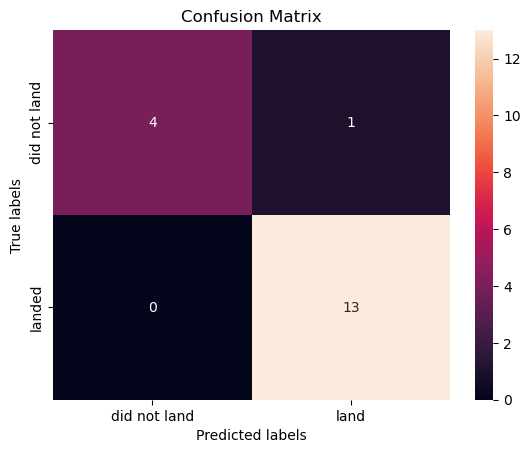

In [158]:
plot_confusion_matrix(Ytest,yhat)

# only 1 wrong prediction , this model is very good , let's see the others

In [159]:
# let's try SVM

In [160]:
parameters2={'kernel':('linear','rbf','poly','rbf','sigmoid'),
            'C':np.logspace(-3,3,5),
            'gamma':np.logspace(-3,3,5)}
            

In [161]:
svm=SVC(max_iter=1000)

In [162]:
svm_cv=GridSearchCV(svm,parameters2,cv=10)

In [163]:
svm_cv.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=SVC(max_iter=1000),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [164]:
print('the best hyperparameters ',svm_cv.best_params_)
print('the accuarcy of hyperparmeters ',svm_cv.best_score_)

# 82% for hyperparameters accuracy 

the best hyperparameters  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
the accuarcy of hyperparmeters  0.8285714285714286


In [165]:
print('the accuarcy of the test data for this model (SVM) is ',svm_cv.score(Xtest,Ytest))

# same accuracy , excellent 

the accuarcy of the test data for this model (SVM) is  0.9444444444444444


In [166]:
yhat2=svm_cv.predict(Xtest)

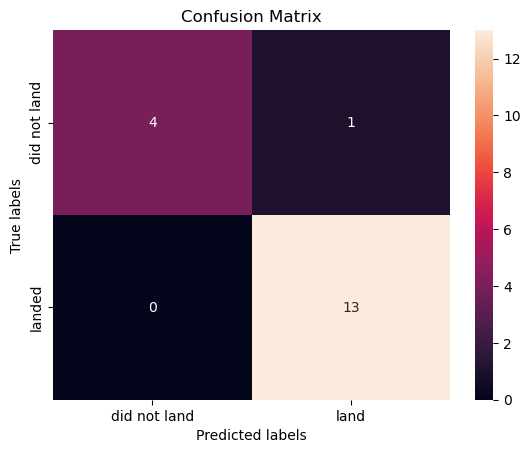

In [167]:
plot_confusion_matrix(Ytest,yhat)
# also here only 1 bad prediction , so now I have Logistic Regression and SVM as best models 

In [168]:
# Decision Tree

In [169]:
parameters3 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [170]:
tree=DecisionTreeClassifier()

In [171]:
tree_cv=GridSearchCV(tree,parameters3,cv=10)

In [172]:
tree_cv.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [173]:
print('the best parameters here are ',tree_cv.best_params_)
print('the accuracy here ',tree_cv.best_score_)

# hyperparameters is higer 88% accuracy

the best parameters here are  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
the accuracy here  0.875


In [174]:
print('the accuracy of test data for this model (Tree) is ',tree_cv.score(Xtest,Ytest))

# the accuracy of the model is 83 % that's meaning that the model is overfitting ( only perfrom will with train data )

the accuracy of test data for this model (Tree) is  0.8333333333333334


In [175]:
yhat3=tree_cv.predict(Xtest)

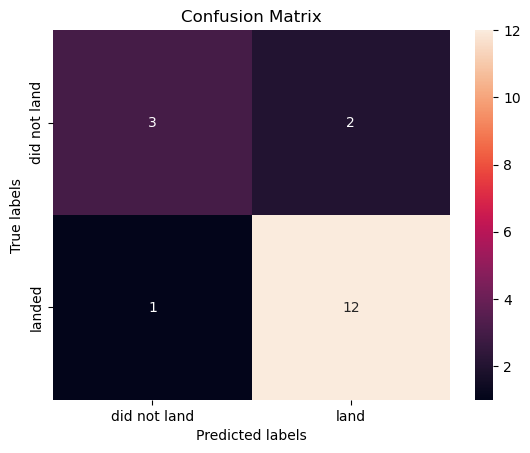

In [176]:
plot_confusion_matrix(Ytest,yhat3)

# the accuracy is low 83% yet the confusion matrix did will , I have better options above

In [177]:
# KNN Model

In [178]:
parameters4=parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


In [179]:
knn=KNeighborsClassifier()

In [180]:
knn_cv=GridSearchCV(knn,parameters4,cv=10)

In [181]:
knn_cv.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [182]:
print('best parameters for this model ',knn_cv.best_params_)
print('accuracy for these parameters',knn_cv.best_score_)

# quite low hyperparameters accuracy 82%

best parameters for this model  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy for these parameters 0.8160714285714284


In [183]:
print('the accuracy for the test data for this model (KNN) is ',knn_cv.score(Xtest,Ytest))

# also the accuracy of this model is low 83 %

the accuracy for the test data for this model (KNN) is  0.8333333333333334


In [184]:
yhat4=knn_cv.predict(Xtest)

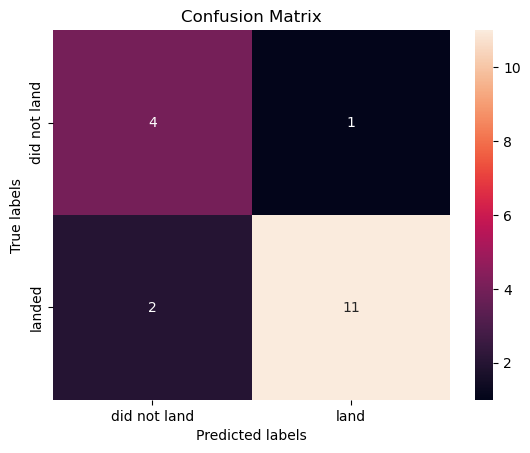

In [185]:
plot_confusion_matrix(Ytest,yhat4)

# did will with confusion matrix isn't enough 

In [186]:
# Now after finishing this project is very helpful to know that logistic regression model and SVM are best models I can use to predict weather the next Falcon 9 first stage will land successfully or not 

In [ ]:
# Thank you !